In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\15510\AppData\Local\Temp\ipykernel_25452\1504740327.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


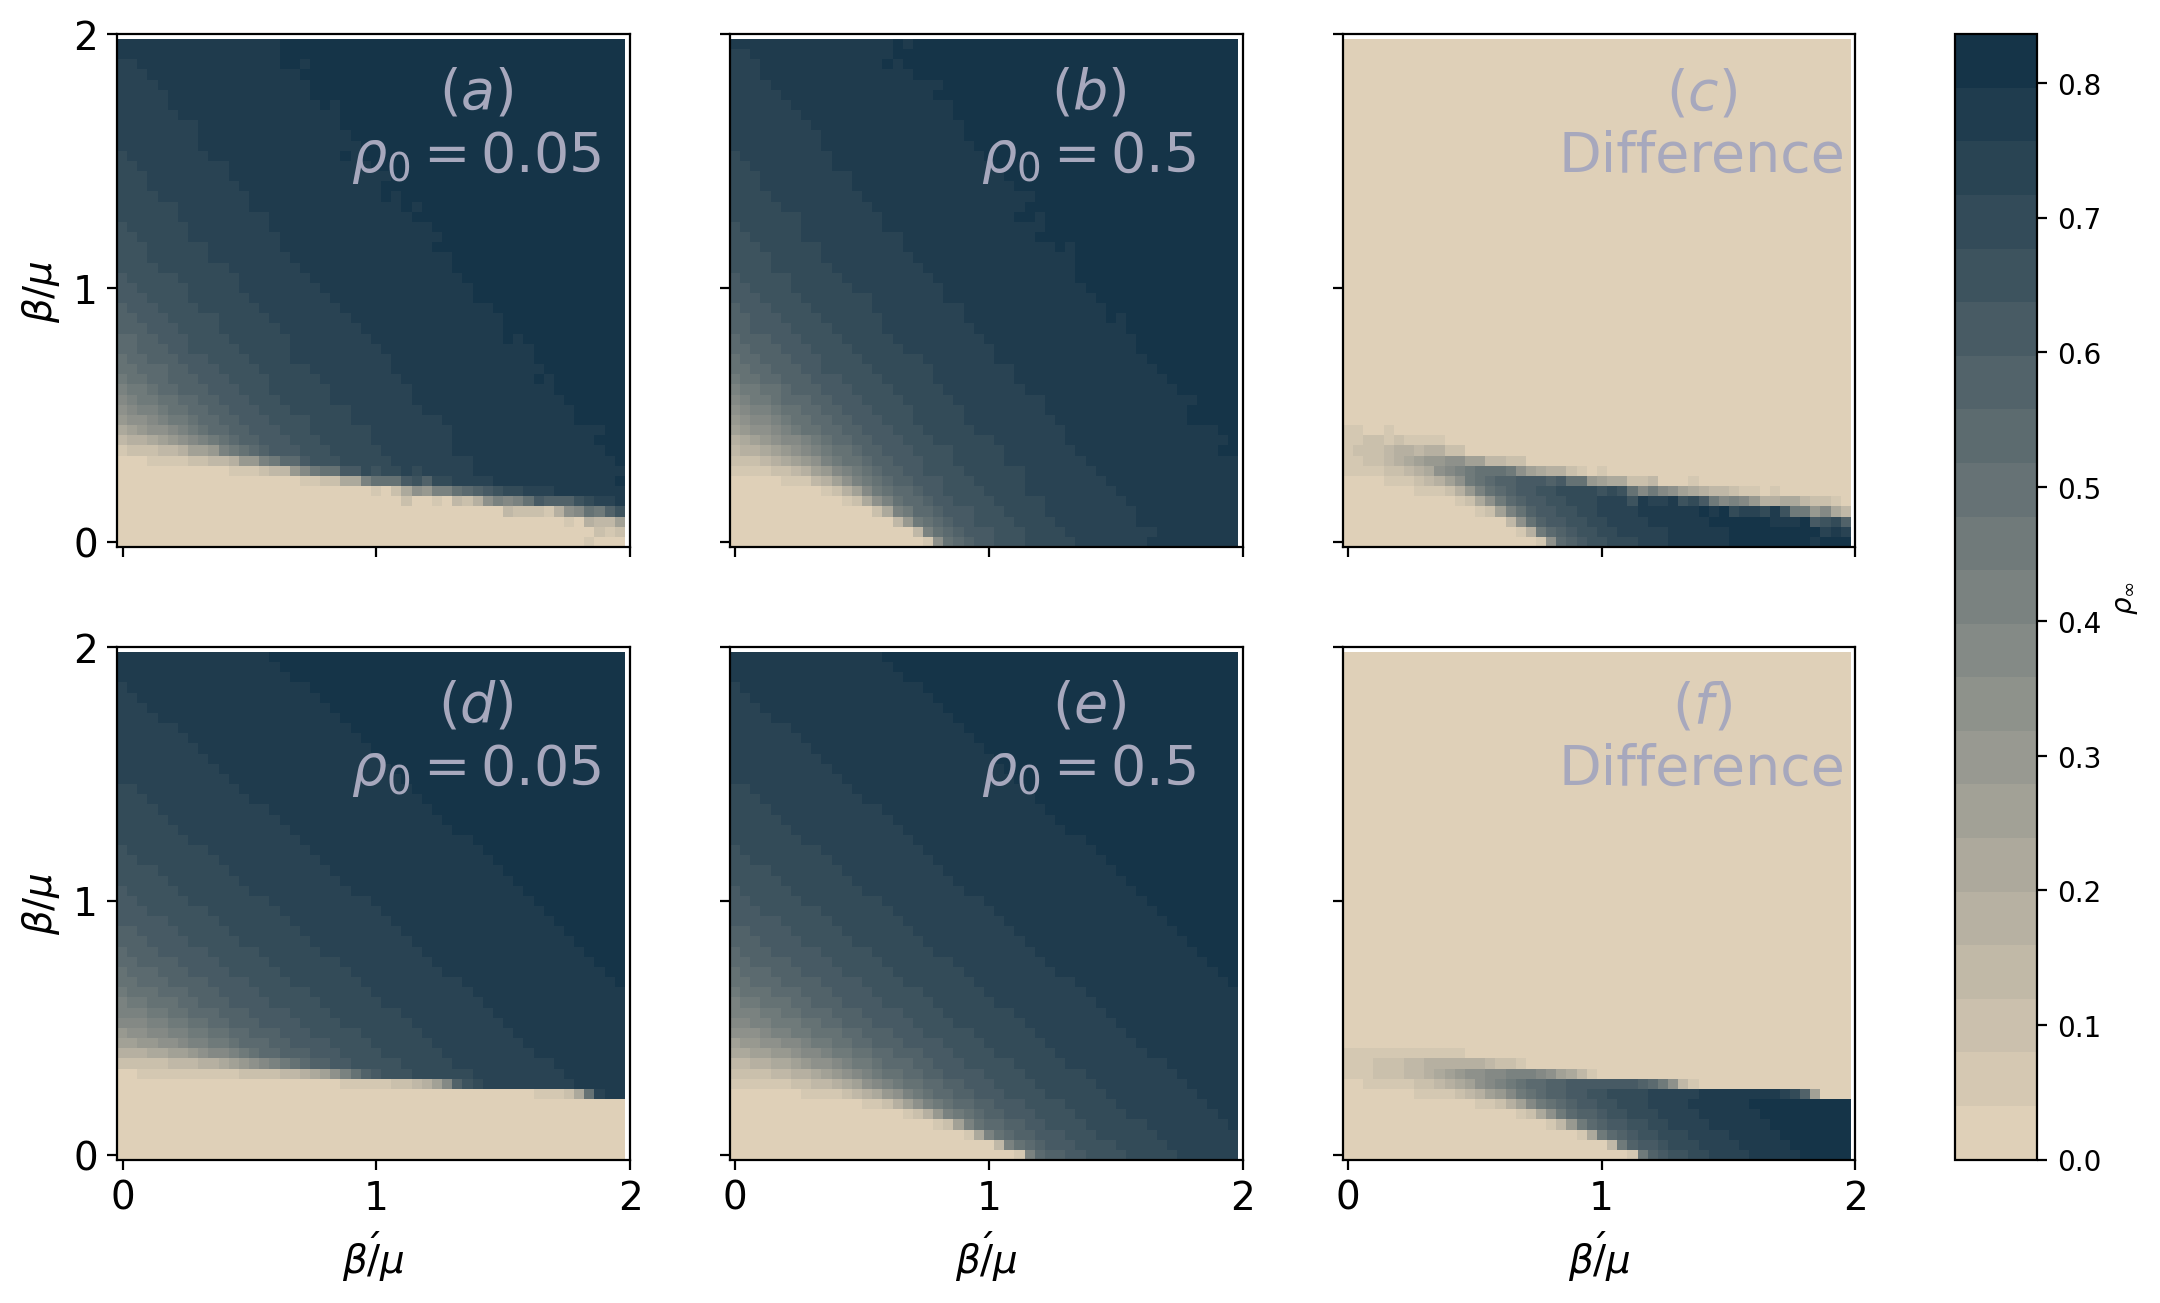

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import LinearSegmentedColormap

# 读取模拟结果数据
df = pd.read_csv('../simulation_result/Fig06.csv', header=None)
df.columns = ['infect_result', 'beta', 'beta_h', 'mu', 'id', 'seed'] + ["S_K", "S_HighOrderK", "S_CC_Ratio",
                                                                        "I_K", "I_HighOrderK", "I_CC_Ratio",
                                                                        "A_K", "A_HighOrderK", "A_CC_Ratio"]
df = df.groupby('id').mean()

# 根据种子值分组并计算数据差异
data1 = df.loc[df['seed'] == 0.05, ['beta', 'beta_h', 'infect_result']].round(3).pivot('beta', 'beta_h', 'infect_result').fillna(0)
data2 = df.loc[df['seed'] == 0.5, ['beta', 'beta_h', 'infect_result']].round(3).pivot('beta', 'beta_h', 'infect_result').fillna(0)
data3 = data2 - data1

# 读取保存的数据并绘制热力图
data1_saved = pd.read_csv('../simulation_result/Fig06_data1.csv')
data2_saved = pd.read_csv('../simulation_result/Fig06_data2.csv')
data3_saved = pd.read_csv('../simulation_result/Fig06_data3.csv')

# 创建一个 2x3 的子图布局
fig = plt.figure(figsize=(12, 8), dpi=200)
grids = ImageGrid(fig, rect=(0.1, 0.15, 0.8, 0.8), nrows_ncols=(2, 3),
                  axes_pad=0.5, label_mode="L", cbar_location="right", cbar_mode="single", cbar_size="8%")

colors = ['#DFD0B8', '#153448']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=21)

# 标题描述信息
titles = [
    r'$(a)$' + '\n' + r'$\rho_0 = 0.05$', r'$(b)$' + '\n' + r'$\rho_0 = 0.5$', r'$(c)$' + '\n' + 'Difference',
    r'$(d)$' + '\n' + r'$\rho_0 = 0.05$', r'$(e)$' + '\n' + r'$\rho_0 = 0.5$', r'$(f)$' + '\n' + 'Difference'
]



# 绘制热力图
for grid, data, title in zip(grids, [data1, data2, data3, data1_saved, data2_saved, data3_saved], titles):
    im = grid.imshow(data, cmap=cmap, origin='lower')
    grids.cbar_axes[0].colorbar(im)
    grid.grid(visible=False)
    grid.get_xaxis().set_ticks([0, 25, 50], [0, 1, 2])
    grid.get_yaxis().set_ticks([0, 25, 50], [0, 1, 2])
    grid.tick_params(labelsize=14)
    grid.set_ylabel(r'$\beta/\mu$', fontsize=14)
    grid.set_xlabel(r'$\beta\'/\mu$', fontsize=14)
    grid.set_title(title, y=0.7, x=0.7, fontsize=20, c='#a7a8bd')

# 设置颜色条标签
cax = grids.cbar_axes[0]
axis = cax.axis[cax.orientation]
axis.label.set_text("$\\rho_{\infty}$")

# 调整布局并保存图像
plt.tight_layout()
plt.savefig('D:\科研任务\HighOrder-Ada\FIG\Fig06_heatmap.pdf', format='pdf', bbox_inches='tight')
plt.show()
